In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np

In [14]:
import pickle
with open('/ai2es/val_probs.pickle', 'rb') as handle:
    p = pickle.load(handle)
with open('/ai2es/val_uncertainties.pickle', 'rb') as handle:
    u = pickle.load(handle)
with open('/ai2es/val_labels.pickle', 'rb') as handle:
    l = pickle.load(handle)

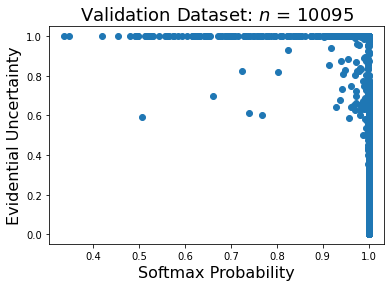

In [4]:
_, ax = plt.subplots()
max_probs = [torch.Tensor(t).cpu() for t in p][0].numpy()
uncertainty = [torch.Tensor(t).cpu() for t in u][0].numpy()
ax.scatter(max_probs,uncertainty)
# ax.set_ylim([0.0,1.0])
# ax.set_xlim([0.5, 1.0])
ax.set_xlabel("Softmax Probability", fontsize=16)
ax.set_ylabel("Evidential Uncertainty", fontsize=16)
ax.set_title(f'Validation Dataset: $n$ = {len(max_probs)}', fontsize=18)
plt.savefig("/ai2es/plots/uncertainty_probability_scatter.png")
plt.show()

/home/vanessa/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

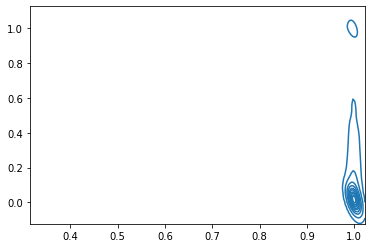

In [5]:
import seaborn as sns
sns.kdeplot(max_probs, uncertainty)

(array([8572.,  543.,  247.,  168.,   90.,   60.,   59.,   49.,   30.,
         277.]),
 array([0.00181329, 0.10163195, 0.20145063, 0.3012693 , 0.40108797,
        0.50090665, 0.6007253 , 0.700544  , 0.80036265, 0.90018135,
        1.        ], dtype=float32),
 <BarContainer object of 10 artists>)

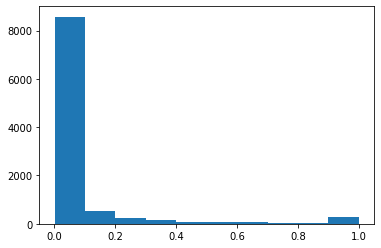

In [6]:
plt.hist([torch.Tensor(t).cpu().numpy() for t in u][0],)

(array([2.000e+00, 2.000e+00, 1.500e+01, 9.000e+00, 1.600e+01, 1.900e+01,
        1.900e+01, 1.800e+01, 3.600e+01, 9.959e+03]),
 array([0.3373447 , 0.40361023, 0.46987575, 0.5361413 , 0.6024068 ,
        0.6686723 , 0.7349379 , 0.8012034 , 0.86746895, 0.9337345 ,
        1.        ], dtype=float32),
 <BarContainer object of 10 artists>)

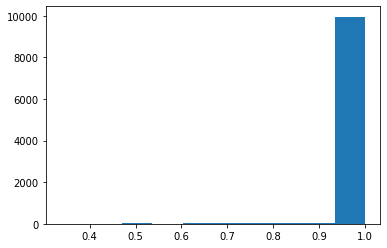

In [7]:
plt.hist([torch.Tensor(t).cpu().numpy() for t in p][0])

In [13]:

annealing_step = 0.01
epoch_num= 1
annealing_coef = torch.min(
        torch.tensor(1.0, dtype=torch.float32),
        torch.tensor(epoch_num / annealing_step, dtype=torch.float32),
    )

In [14]:
annealing_coef

tensor(1.)